## Activity: K-means++

## Part 1)

In [1]:
import numpy as np
from scipy.io import loadmat
from scipy.io import savemat
import matplotlib.pyplot as plt 
file = open('Data.txt', 'r')
import_data = eval(file.read())
import time

################################################################################################### 
# This kMeans implementation was modified from Activity10 used in class for ECE 532, Spring 2020 #
# Notice that kMeans and kMeans_init are basically the same function, the differences is just    #
# that kMeans_init also allows you to not provide starting centroids.                            #
# In practice, only include one of the two functions                                             #
##################################################################################################
def kMeans(X, K, centroids, maxIters = 20, plot_progress = None):
    for i in range(maxIters):
        # Cluster Assignment step
        C = np.array([np.argmin([(x_i-y_k)@(x_i-y_k) for y_k in centroids]) for x_i in X])
        # Update centroids step 
        centroids = []
        for k in range(K):
            if (C == k).any():
                centroids.append( X[C == k].mean(axis = 0) )
            else: # if there are no data points assigned to this certain centroid
                centroids.append( X[np.random.choice(len(X))] )
        if plot_progress != None: plot_progress(X, C, np.array(centroids))
            
    return np.array(centroids) , np.array(C, dtype=bool)

##### We con combine these two versions later
def kMeans_init(X, K, maxIters = 20, plot_progress = None, centroids_init = None):
    
    if centroids_init is None:
        centroids = X[np.random.choice(len(X), K)]
    else: 
        centroids = centroids_init
        
    for i in range(maxIters):
        # Cluster Assignment step
        C = np.array([np.argmin([(x_i-y_k)@(x_i-y_k) for y_k in centroids]) for x_i in X])
        # Update centroids step 
        centroids = []
        for k in range(K):
            if (C == k).any():
                centroids.append( X[C == k].mean(axis = 0) )
            else: # if there are no data points assigned to this certain centroid
                centroids.append( X[np.random.choice(len(X))] )
        if plot_progress != None: plot_progress(X, C, np.array(centroids))
    return np.array(centroids) , C

In [2]:
# Update this value, to explore the result of the error of k-means with rectangles of different widths
width = 10

# Define A for activity as in question 1 of assignment
A = np.array([[0, 0, width, width], [0, 4, 0, 4]])

# k-means with 2 cluster
# We choose two bad starting centroids for illustration
c_0 = np.array([[width / 2, width / 2], [-1, 5]]).transpose()
centroids, C = kMeans(A.transpose(), 2, centroids=c_0, maxIters=2)

# Data points assigned to cluster 1
A_1 = A[:,np.logical_not(C)]
# Data points assigned to cluster 2
A_2 = A[:, C]
centroids = centroids.transpose()
#Plots the elements of cluster 1 in red
plt.plot(A_1[0,:], A_1[1,:], 'rp', markersize=10)
plt.plot(centroids[0,0], centroids[1,0], 'rp', markersize=14)

#Plots the elements of cluster 2 in blue
plt.plot(A_2[0,:], A_2[1,:], 'bp', markersize=10)
plt.plot(centroids[0,1], centroids[1,1], 'bp', markersize=14)
plt.legend(['Elements assigned to cluster 1', 'Centroid of cluster 1', 'Elements assigned to cluster 2', 'Centroid of cluster 1',])
plt.show()
# What happens to the error of the k-means as width increases?
# Complete this line based on your knowledge of the error of K-means
error_1 = 
print(error_1)
error_2 = 
print(error_2)

SyntaxError: invalid syntax (<ipython-input-2-e59398acdb2d>, line 28)

## Part 2)

In [3]:
###################################################################################################
# Functions distance, initialize, and plot implementation were modified                           #
# from https://www.geeksforgeeks.org/ml-k-means-algorithm/ used in class for ECE 532, Spring 2020 #
################################################################################################### 
import sys

def plot(data, centroids): 
    ## Taken from https://www.geeksforgeeks.org/ml-k-means-algorithm/
    ## Used to plot data points, previously selected centroids, 
    ## and next centroid selected 
    plt.scatter(data[:, 0], data[:, 1], marker = '.',  
                color = 'gray', label = 'data points') 
    plt.scatter(centroids[:-1, 0], centroids[:-1, 1],  
                color = 'black', label = 'previously selected centroids') 
    plt.scatter(centroids[-1, 0], centroids[-1, 1],  
                color = 'red', label = 'next centroid') 
    plt.title('Select % d th centroid'%(centroids.shape[0])) 
      
    plt.legend() 
    plt.xlim(-5, 12) 
    plt.ylim(-10, 15) 
    plt.show() 
           
def distance(p1, p2):
    ## Taken from https://www.geeksforgeeks.org/ml-k-means-algorithm/
    ## Computes euclidean distance between data points 
    return np.sum((p1 - p2)**2) 
   
def initialize(data, k, plot_2D = False): 
    ## Taken from https://www.geeksforgeeks.org/ml-k-means-algorithm/
    ''' 
    intialized the centroids for K-means++ 
    inputs: 
        data - numpy array of data points having shape (200, 2) 
        k - number of clusters  
    '''
    ## initialize the centroids list  
    ## choose the first cluster center randomly 
    centroids = []
    centroids.append(data[np.random.randint( 
            data.shape[0]), :]) 
    if plot_2D:
        plot(data, np.array(centroids)) 
   
    ## compute remaining k - 1 centroids 
    for c_id in range(k - 1): 
          
        ## initialize a list to store distances of data 
        ## points from nearest centroid 
        dist = [] 
        for i in range(data.shape[0]): 
            point = data[i, :] 
            d = sys.maxsize 
              
            ## compute distance of 'point' from each of the previously 
            ## selected centroid and store the minimum distance 
            for j in range(len(centroids)): 
                temp_dist = distance(point, centroids[j]) 
                d = min(d, temp_dist) 
            dist.append(d) 
              
        ## select data point with maximum distance as our next centroid 
        ## Note: In algorithm write-up larger distance meant selected with 
        ## higher probability, here simply select data point with max
        ## distance
        dist = np.array(dist) 
        # Please fill in the next line without looking up the solution 
        # online :)
        next_centroid = data[np.argmax(dist), :]
        centroids.append(next_centroid) 
        dist = [] 
        if plot_2D:
            plot(data, np.array(centroids)) 
    return centroids

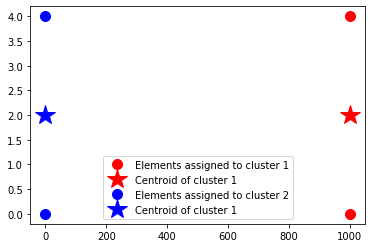

[2.0, 2.0]
[2.0, 2.0]
[[1000.    0.]
 [   2.    2.]]


In [14]:
###################################################################################################
# Try different values for the width
# What do you notice about the cluster centers and the error?
# Compare them to that of question 1
################################################################################################### 

width = 1000

# Define A for activity as in question 1 of assignment
A = np.array([[0, 0, width, width], [0, 4, 0, 4]])

# k-means with 2 cluster
# We choose two bad starting centroids for illustration
#c_0 = np.array([[width / 2, width / 2], [-1, 5]]).transpose()
#centroids, C = kMeans(A.transpose(), 2, centroids=c_0, maxIters=2)

# Now use a the new clustering method
init_converge = initialize(A.T, 2)
centroids, C = kMeans_init(A.T, 2,centroids_init=init_converge)
C = np.array(C, dtype=bool)
# Data points assigned to cluster 1
A_1 = A[:,np.logical_not(C)]
# Data points assigned to cluster 2
A_2 = A[:, C]
centroids = centroids.transpose()
#Plots the elements of cluster 1 in red
plt.plot(A_1[0,:], A_1[1,:], 'ro', markersize=10)
plt.plot(centroids[0,0], centroids[1,0], 'r*', markersize=20)

#Plots the elements of cluster 2 in blue
plt.plot(A_2[0,:], A_2[1,:], 'bo', markersize=10)
plt.plot(centroids[0,1], centroids[1,1], 'b*', markersize=20)
plt.legend(['Elements assigned to cluster 1', 'Centroid of cluster 1', 'Elements assigned to cluster 2', 'Centroid of cluster 1',])
plt.show()

# What happens to the error of the k-means as width increases?
# Complete this line based on your knowledge of the error of K-means
error_1 = 
print(error_1)
error_2 = 
print(error_2)
print(centroids)

## Part 3)

In [ ]:
# Original data created and plotted using modified code from
# https://www.geeksforgeeks.org/ml-k-means-algorithm/
# Use output from file so results reproducible
dist_01 = import_data['dist_01']
dist_02 = import_data['dist_02']
dist_03 = import_data['dist_03']

# Display data aim to cluster. Data that should be 
# in same cluster shares a color. 
plt.scatter(dist_01[:, 0], dist_01[:, 1], color = 'green') 
plt.scatter(dist_02[:, 0], dist_02[:, 1], color = 'red')
plt.scatter(dist_03[:, 0], dist_03[:, 1], color = 'blue') 

# Coalesce data into one np array, so can use 
# k means to cluster
data = np.vstack((dist_01, dist_02, dist_03)) 
np.random.shuffle(data) 

##################################################################################################
# Part 3A) 
##################################################################################################

# Note the issue with final clusters (the black dots)
# when poor initial clusters are used
init_wrong_convergence   = np.array([[3, 3.5],
                                     [ 6, -5],
                                     [ 8, -5]])

centroids, C = kMeans_init(data, 3, maxIters = 20, plot_progress = None, centroids_init = init_wrong_convergence)

plt.title("Final Cluster Centers: Poor initialization")
plt.scatter(centroids[:,0], centroids[:,1], color='black', label='Cluster Centers')
plt.legend()
plt.show()

In [ ]:
##################################################################################################
# Part 3B) 
##################################################################################################

## Choose initial cluster centers using k-means++ algorithm
init_correct_convergence = initialize(data, 3, True)

plt.scatter(dist_01[:, 0], dist_01[:, 1], color = 'green') 
plt.scatter(dist_02[:, 0], dist_02[:, 1], color = 'red')
plt.scatter(dist_03[:, 0], dist_03[:, 1], color = 'blue') 

centroids, C = kMeans_init(data, 3, maxIters = 20, plot_progress = None, centroids_init = init_correct_convergence)

plt.title("Final Cluster Centers: Using K-Means++ initialization")
plt.scatter(centroids[:,0], centroids[:,1], color='black', label="Cluster Centers")
plt.legend()
plt.show()


## Part 4)

In [20]:
A = np.random.rand(2, 5) * 10
print(A)
c_1 = A[:,np.random.randint(low=0, high=4)]
print(c_1)
# Complete the activity part 4 to find all probabilities for the different poitns
# set c_2 to the point with the greates probability
c_2 = 
plt.plot(A[0,:], A[1,:], 'b+')
plt.plot(c_1[0], c_1[1], fillstyle='none', markersize=15, marker='o', color='red')
plt.plot(c_2[0], c_2[1], fillstyle='none', markersize=15, marker='o', color='red')
plt.title('Data points and the first two starting clusters defined by K-means++')
plt.show()

SyntaxError: invalid syntax (<ipython-input-20-ff1420fb6ce0>, line 7)

## Part 5)

In [5]:
def normalize_data(data):
    n_data = np.zeros(data.shape)
    min_1 = min(data[0,:])
    min_2 = min(data[1,:])
    min_3 = min(data[2,:])
    den_1 = max(data[0,:]) - min_1
    den_2 = max(data[1,:]) - min_2
    den_3 = max(data[2,:]) - min_3
    for d in range(data.shape[1]):
        n_data[0][d] = (data[0][d] - min_1) / den_1
        n_data[1][d] = (data[1][d] - min_2) / den_2
        n_data[2][d] = (data[2][d] - min_3) / den_3
        
    return n_data

In [6]:
##################################################################################################
# Part 5) Stock Market Application
##################################################################################################

from scipy.io import loadmat
data_file = loadmat('stock_data.mat')
data = data_file['data']
data = normalize_data(data)
clust_sizes = data_file['n_points']
feature_names = data_file['feature_names']
start_ind = 0
starts = []
for s in clust_sizes:
    starts.append(start_ind)
    start_ind += s[0]
    
starts.append(data.shape[1])
x_label = feature_names[0][0][0]
y_label = feature_names[1][0][0]
z_label = feature_names[2][0][0]

    
def plot_test_clusters(n_cluster, n_points, data, offset=0, clusters=None, title_string=None):
    %matplotlib notebook
    from mpl_toolkits.mplot3d import Axes3D
    
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    if title_string is not None: 
        ax.set_title(title_string)
    
    labels = []
    for n in range(n_cluster):
        c_data = np.real(data[:,n_points[n]:n_points[n+1]])
        ax.scatter(c_data[0+offset,:], c_data[1+offset,:], c_data[2+offset,:], c=colors[n], marker='o', alpha=0.3)
        labels.append('Cluster no: ' + str(n+1))
        
    if clusters is not None: 
        ax.scatter(clusters[0,:], clusters[1,:], clusters[2,:], color = 'black', marker='s')
        labels.append('Cluster Centers')
    
    ax.legend(labels)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_zlabel(z_label)
    plt.show()
    
plot_test_clusters(5, starts, data, title_string="Stock Market Data")

<IPython.core.display.Javascript object>


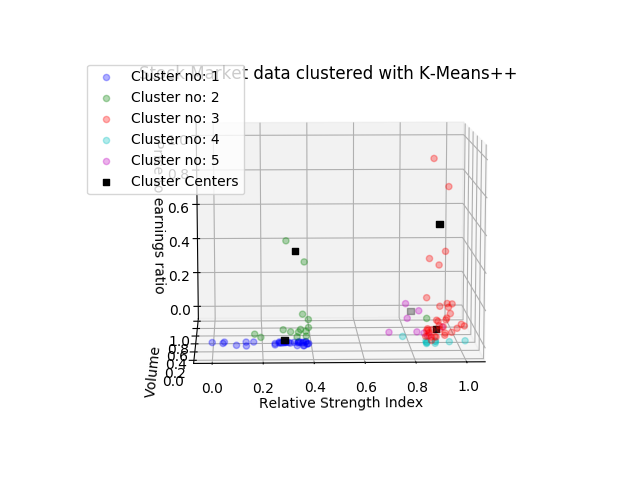

Runtime for K-Means++:  0.29415273666381836


In [25]:
##################################################################################################
# Part 5A) K-Means++ 
##################################################################################################
t0 = time.time()
centroids, C = kMeans_init(data.T, 5, maxIters = 50, plot_progress = None, 
                           centroids_init = initialize(data.T, 5, plot_2D = False))
t1 = time.time()

plot_test_clusters(5, starts, data, 0, centroids.T, "Stock Market data clustered with K-Means++")
print("Runtime for K-Means++: ", t1 - t0)

<IPython.core.display.Javascript object>


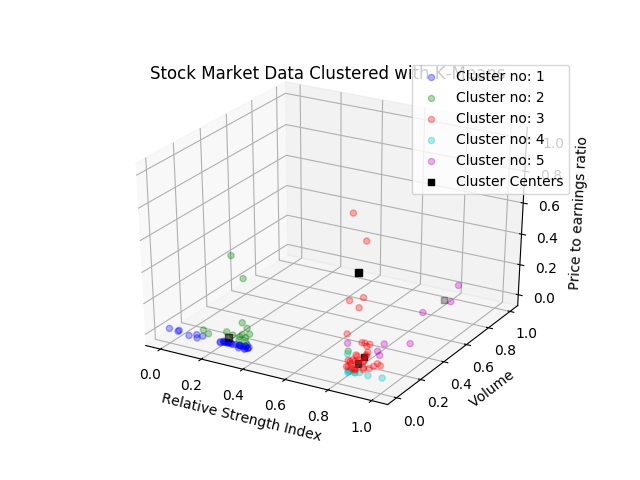

Runtime for K-Means:  0.19956135749816895


In [27]:
##################################################################################################
# Part 5B) K-Means
##################################################################################################
t0 = time.time()
centroids, C = kMeans_init(data.T, 5, maxIters = 50, plot_progress = None, centroids_init = None)
t1 = time.time()

plot_test_clusters(5, starts, data, 0, centroids.T, "Stock Market Data Clustered with K-Means")
print("Runtime for K-Means: ", t1 - t0)